# Deepgreen hosts/os info

In [12]:
%matplotlib inline

import dg.conn
from dg.admin import hosts
con = dg.conn.Conn("host=localhost dbname=tpch1f")
print (con.ver)

4


In [13]:
#default nsec = 5
xt = hosts.xt_vmstat_hosts(con)
rows = xt.execute()

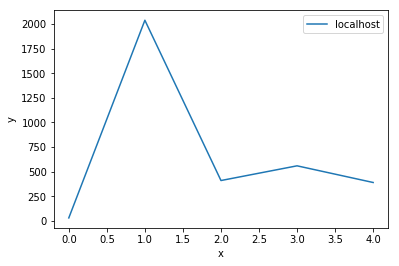

In [14]:
# Plot a line chart.   Most interesting vmstat stats might be
# vmstat_us: user space CPU usage
# vmstat_bi/bo: bytes read/written in a second
# vmstat_si/so: bytes swapped in/out in a second.  If si/so is significant, this is wrong -- fix it.
# vmstat_in/cs: interrupt/context switch in a second.
# vmstat_us/sy: user space/os CPU usage.

import dg.dsutil.plot
lc = dg.dsutil.plot.LineChart()
addr = xt.coldata('addr', rows)
data = xt.coldata('vmstat_cs', rows)
for (a, b) in zip(addr, data):
    # print(a, b)
    lc.acc.add(a, b)
lc.refresh()